In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Retrieve Data from .CSV file

In [2]:
# Import data
df = pd.read_csv('Resources/earthquake_data.csv')

display(df.head())

,id,time,place,longitude,latitude,depth,magnitude,felt,cdi,mmi,...,t_axis_length,t_axis_plunge,percent_double_couple,scalar_moment,tensor_mpp,tensor_mrp,tensor_mrr,tensor_mrt,tensor_mtp,tensor_mtt
0,nc30092964,1995-12-28 18:28:01.230000+00:00,"9 km WNW of Topaz Lake, Nevada",-119.654500,38.714500,-1.011,4.80,NaN,NaN,6.1,...,1.780000e+16,8.496,0.94,1.749000e+16,1.717000e+16,-2.593000e+15,-2.563000e+14,-1.434000e+15,2.590000e+15,-1.691000e+16
1,nc30092581,1995-12-23 05:39:56.650000+00:00,"8 km WNW of Topaz Lake, Nevada",-119.633000,38.730500,-1.081,4.70,NaN,NaN,NaN,...,1.120000e+16,8.968,0.83,1.175000e+16,1.082000e+16,1.325000e+15,-2.496000e+14,4.455000e+15,1.729000e+15,-1.057000e+16
2,nc30092506,1995-12-22 09:00:34.560000+00:00,California-Nevada border region,-119.635000,38.721500,3.659,4.86,NaN,NaN,NaN,...,2.764000e+16,3.308,0.53,2.435000e+16,2.737000e+16,-2.897000e+15,-1.909000e+16,-4.715000e+15,-1.774000e+15,-8.282000e+15
3,nc30091857,1995-12-13 06:25:54.110000+00:00,"9 km ESE of Gilroy, California",-121.470333,36.982167,4.234,3.80,NaN,NaN,NaN,...,7.785000e+14,15.899,0.81,7.420000e+14,4.317000e+14,2.781000e+14,-4.776000e+13,-3.905000e+13,5.545000e+14,-3.840000e+14
4,nc30094697,1995-12-13 05:45:12.760000+00:00,"9 km ESE of Gilroy, California",-121.470000,36.976667,6.204,3.90,NaN,NaN,NaN,...,8.142000e+14,9.016,0.49,9.521000e+14,3.951000e+14,2.489000e+13,2.802000e+14,1.330000e+14,7.743000e+14,-6.753000e+14


## Clean Data

In [3]:
# Check data for completeness and data types
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427 entries, 0 to 1426
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1427 non-null   object 
 1   time                   1427 non-null   object 
 2   place                  1427 non-null   object 
 3   longitude              1427 non-null   float64
 4   latitude               1427 non-null   float64
 5   depth                  1427 non-null   float64
 6   magnitude              1427 non-null   float64
 7   felt                   1127 non-null   float64
 8   cdi                    1127 non-null   float64
 9   mmi                    1071 non-null   float64
 10  significance           1427 non-null   int64  
 11  number_stations        1425 non-null   float64
 12  min_station_distance   1412 non-null   float64
 13  nodal_plane_1_dip      1427 non-null   float64
 14  nodal_plane_1_rake     1427 non-null   float64
 15  noda

None

Datatypes are what we need since all of the numerical columns are either floating point or integer numbers.

However, there are quite a few rows with `NaN` values especially in the `mmi` column. Let's determine how much data we would lose if we dropped those rows.

In [4]:
df.isnull().sum()/len(df)

id                       0.000000
time                     0.000000
place                    0.000000
longitude                0.000000
latitude                 0.000000
depth                    0.000000
magnitude                0.000000
felt                     0.210231
cdi                      0.210231
mmi                      0.249474
significance             0.000000
number_stations          0.001402
min_station_distance     0.010512
nodal_plane_1_dip        0.000000
nodal_plane_1_rake       0.000000
nodal_plane_1_strike     0.000000
nodal_plane_2_dip        0.000000
nodal_plane_2_rake       0.000000
nodal_plane_2_strike     0.000000
n_axis_azimuth           0.000000
n_axis_length            0.000000
n_axis_plunge            0.000000
p_axis_azimuth           0.000000
p_axis_length            0.000000
p_axis_plunge            0.000000
t_axis_azimuth           0.000000
t_axis_length            0.000000
t_axis_plunge            0.000000
percent_double_couple    0.000000
scalar_moment 

We lose about 25% of the data if we drop rows with `NaN`. We will proceed.

In [78]:
df_cleaned = df.dropna().reset_index(drop=True)
display(df_cleaned.head())

df_cleaned.info()

,id,time,place,longitude,latitude,depth,magnitude,felt,cdi,mmi,...,t_axis_length,t_axis_plunge,percent_double_couple,scalar_moment,tensor_mpp,tensor_mrp,tensor_mrr,tensor_mrt,tensor_mtp,tensor_mtt
0,nc21044694,1999-08-18 01:06:18.940000+00:00,"0 km S of Bolinas, California",-122.686500,37.907333,7.659,4.60,1545.0,5.8,5.38,...,8.312000e+15,80.769,0.48,9.756000e+15,-2.216000e+15,-1.915000e+15,7.806000e+15,2.421000e+15,6.588000e+15,-5.590000e+15
1,nc21140955,2000-12-27 13:15:11.220000+00:00,"20 km SW of Ferndale, California",-124.460167,40.466000,28.026,4.10,82.0,3.8,2.86,...,1.490000e+15,32.902,0.96,1.474000e+15,9.714000e+14,-7.529000e+14,1.047000e+14,-7.374000e+14,8.916000e+13,-1.076000e+15
2,nc21139833,2000-12-20 23:39:14.800000+00:00,"12 km NNW of Burney, California",-121.693500,40.988500,17.109,4.40,92.0,4.4,3.53,...,5.141000e+15,6.658,0.84,4.943000e+15,3.524000e+15,1.649000e+15,-4.008000e+15,8.137000e+14,-2.609000e+15,4.844000e+14
3,nc21137862,2000-12-08 07:41:11.460000+00:00,"5 km SW of Cobb, California",-122.766833,38.782333,3.461,4.37,112.0,4.0,3.58,...,5.195000e+15,11.860,0.45,4.482000e+15,4.383000e+15,-1.630000e+15,-1.694000e+15,6.186000e+14,1.983000e+15,-2.690000e+15
4,nc21136858,2000-12-02 15:34:16.320000+00:00,"5 km NW of Kingvale, California",-120.473500,39.357833,4.839,4.40,924.0,4.9,4.82,...,5.552000e+15,14.670,0.99,5.534000e+15,3.222000e+15,3.054000e+14,-9.109000e+14,2.807000e+15,3.791000e+15,-2.311000e+15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     956 non-null    object 
 1   time                   956 non-null    object 
 2   place                  956 non-null    object 
 3   longitude              956 non-null    float64
 4   latitude               956 non-null    float64
 5   depth                  956 non-null    float64
 6   magnitude              956 non-null    float64
 7   felt                   956 non-null    float64
 8   cdi                    956 non-null    float64
 9   mmi                    956 non-null    float64
 10  significance           956 non-null    int64  
 11  number_stations        956 non-null    float64
 12  min_station_distance   956 non-null    float64
 13  nodal_plane_1_dip      956 non-null    float64
 14  nodal_plane_1_rake     956 non-null    float64
 15  nodal_

## Check Effects of Data Cleaning

To get a sense for the effect of dropping rows with `NaN` values, first check summary statistics before and after dropping rows with `NaN` values.

In [56]:
print('Summary statistics with NaN:')
display(df.describe())

print('Summary statistics without NaN:')
display(df_cleaned.describe())

Summary statistics with NaN:


,longitude,latitude,depth,magnitude,felt,cdi,mmi,significance,number_stations,min_station_distance,...,t_axis_length,t_axis_plunge,percent_double_couple,scalar_moment,tensor_mpp,tensor_mrp,tensor_mrr,tensor_mrt,tensor_mtp,tensor_mtt
count,1427.000000,1427.000000,1427.000000,1427.000000,1127.000000,1127.000000,1071.000000,1427.000000,1425.000000,1412.000000,...,1.427000e+03,1427.000000,1427.000000,1.427000e+03,1.427000e+03,1.427000e+03,1.427000e+03,1.427000e+03,1.427000e+03,1.427000e+03
mean,-120.813144,37.650960,8.136674,3.870210,1250.409051,3.919077,4.352554,345.254380,79.255439,0.082293,...,4.187443e+16,17.701558,0.911301,4.184475e+16,2.982361e+16,-6.062950e+14,3.911100e+15,3.951252e+15,8.733096e+15,-3.367618e+16
std,2.313514,1.932381,6.641507,0.513229,4160.008542,0.964623,1.115591,225.751087,53.147142,0.101358,...,7.658868e+17,19.592560,2.968886,7.714061e+17,7.119109e+17,5.880998e+16,1.995786e+17,1.593360e+17,2.086817e+17,7.080923e+17
min,-124.664000,31.523667,-2.261000,3.000000,0.000000,1.000000,1.100000,139.000000,0.000000,0.000000,...,1.130000e+00,0.000000,0.000000,4.003000e+13,-2.253000e+18,-1.353000e+18,-8.595000e+17,-1.617000e+18,-1.066000e+18,-2.553000e+19
25%,-122.743417,36.577333,3.897500,3.500000,20.000000,3.400000,3.613000,210.500000,42.000000,0.023420,...,2.241500e+14,5.382500,0.720000,2.242500e+14,9.676500e+13,-1.078000e+14,-1.931500e+14,-1.018000e+14,-3.456000e+13,-9.363500e+14
50%,-121.252333,37.691667,6.830000,3.790000,88.000000,3.800000,4.231000,256.000000,68.000000,0.048650,...,5.529000e+14,11.079000,0.860000,5.423000e+14,2.965000e+14,-5.490000e+12,-1.268000e+13,-6.380000e+12,8.050000e+13,-2.547000e+14
75%,-118.868917,38.826417,9.891000,4.110000,532.000000,4.300000,5.009500,397.500000,96.000000,0.099910,...,1.825000e+15,20.092500,0.950000,1.826000e+15,1.082000e+15,8.526000e+13,4.638000e+13,1.107000e+14,3.451500e+14,-7.862500e+13
max,-111.094000,41.867700,36.995000,7.100000,60242.000000,9.100000,8.730000,2760.000000,369.000000,0.767600,...,2.688000e+19,89.524000,87.210000,2.711000e+19,2.621000e+19,1.613000e+18,7.402000e+18,5.584000e+18,5.883000e+18,3.285000e+16


Summary statistics without NaN:


,longitude,latitude,depth,magnitude,felt,cdi,mmi,significance,number_stations,min_station_distance,...,t_axis_length,t_axis_plunge,percent_double_couple,scalar_moment,tensor_mpp,tensor_mrp,tensor_mrr,tensor_mrt,tensor_mtp,tensor_mtt
count,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,...,9.560000e+02,956.000000,956.000000,9.560000e+02,9.560000e+02,9.560000e+02,9.560000e+02,9.560000e+02,9.560000e+02,9.560000e+02
mean,-120.589582,37.487732,8.627363,3.966245,1382.548117,4.013703,4.414896,394.868201,79.645397,0.079240,...,6.079484e+16,17.102844,0.974026,6.079379e+16,4.367464e+16,-9.607114e+14,5.894071e+15,5.747097e+15,1.372078e+16,-4.956530e+16
std,2.508304,2.105696,6.839263,0.512105,4463.902581,0.974228,1.101962,251.948922,53.422869,0.081460,...,9.351783e+17,19.014906,3.623653,9.419347e+17,8.695584e+17,7.175641e+16,2.438423e+17,1.946584e+17,2.545645e+17,8.647936e+17
min,-124.664000,31.523667,-2.261000,3.000000,0.000000,1.000000,1.100000,139.000000,0.000000,0.000901,...,1.130000e+00,0.000000,0.000000,4.080000e+13,-2.253000e+18,-1.353000e+18,-8.595000e+17,-1.617000e+18,-1.066000e+18,-2.553000e+19
25%,-122.756625,36.112667,4.145000,3.600000,24.000000,3.400000,3.670000,227.750000,42.000000,0.024240,...,3.007025e+14,5.376250,0.740000,3.055250e+14,1.560500e+14,-1.410500e+14,-2.667250e+14,-1.306250e+14,-3.297250e+13,-1.210000e+15
50%,-121.140750,37.631083,7.249500,3.860000,99.000000,4.000000,4.310500,285.000000,67.000000,0.051395,...,7.434185e+14,10.961500,0.870000,7.253500e+14,4.189000e+14,-8.820000e+12,-2.054500e+13,-7.085000e+12,1.182000e+14,-3.375000e+14
75%,-118.628667,38.826625,10.407500,4.200000,598.250000,4.400000,5.050000,506.250000,98.000000,0.101800,...,2.360250e+15,19.739500,0.950000,2.221750e+15,1.471000e+15,1.013250e+14,5.594750e+13,1.458100e+14,5.528250e+14,-1.185500e+14
max,-111.094000,41.867700,35.620000,7.100000,60242.000000,9.100000,8.730000,2760.000000,369.000000,0.509300,...,2.688000e+19,89.524000,87.210000,2.711000e+19,2.621000e+19,1.613000e+18,7.402000e+18,5.584000e+18,5.883000e+18,3.285000e+16


There are too many numbers to get a good picture. Therefore, look at histograms...

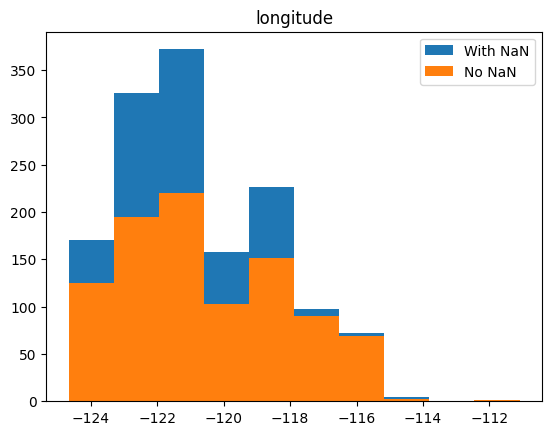

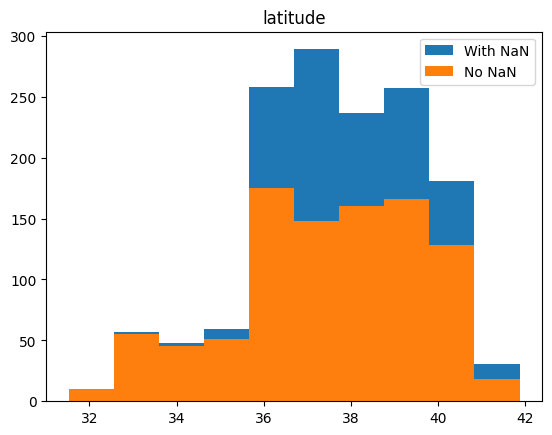

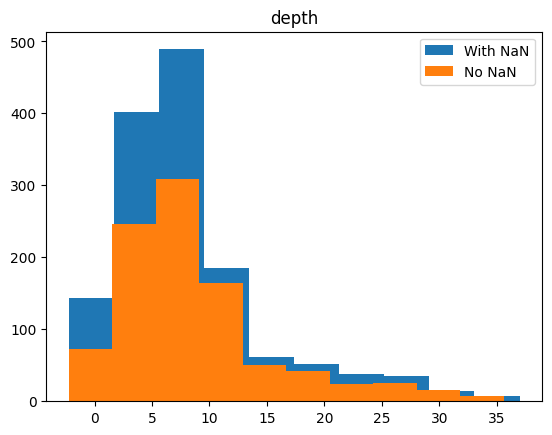

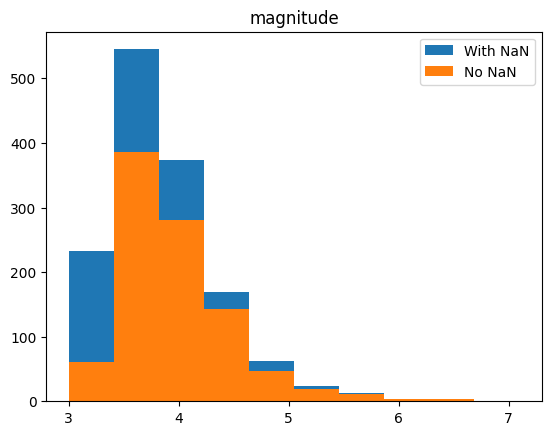

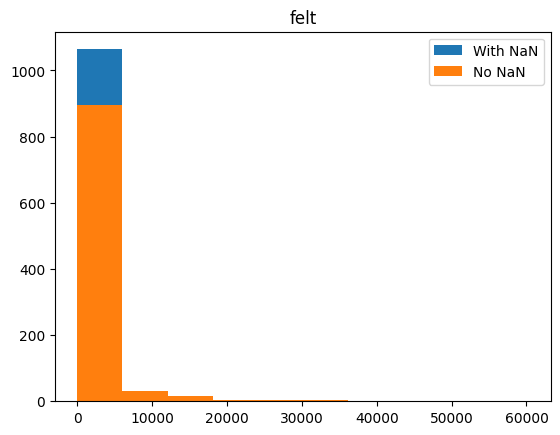

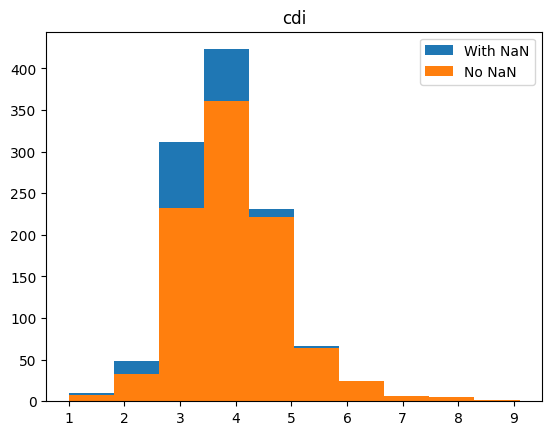

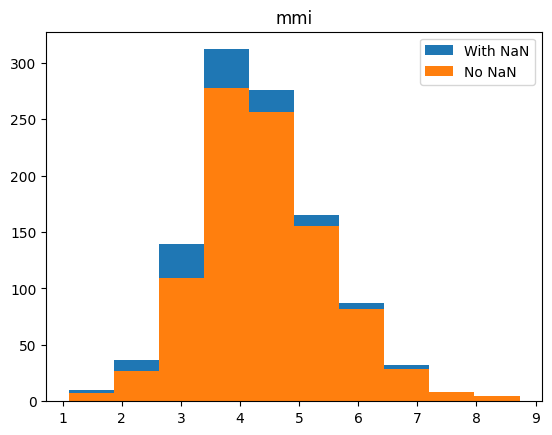

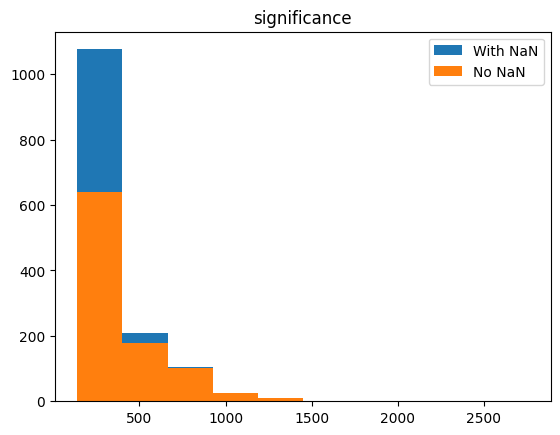

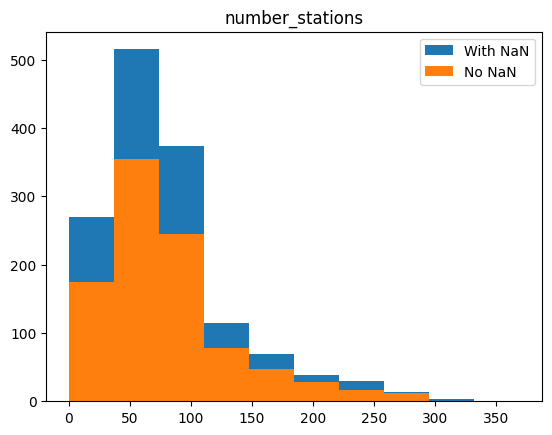

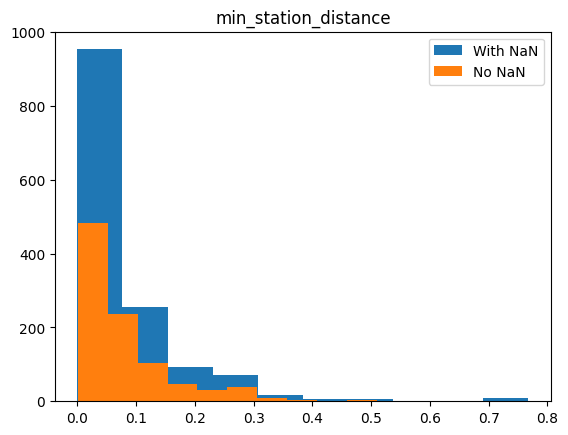

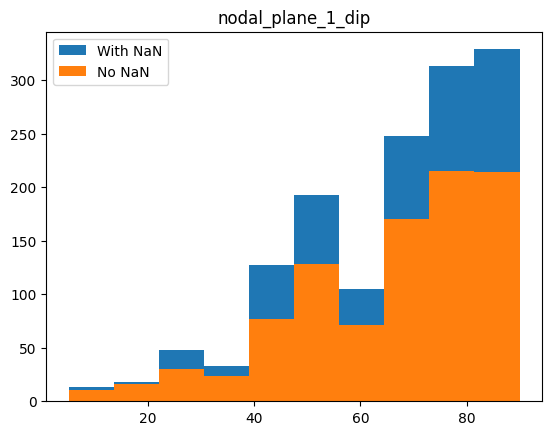

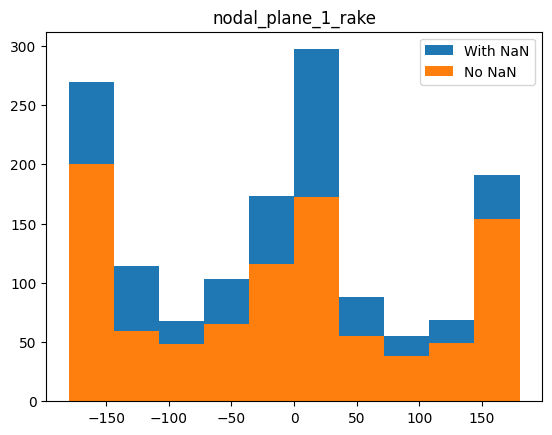

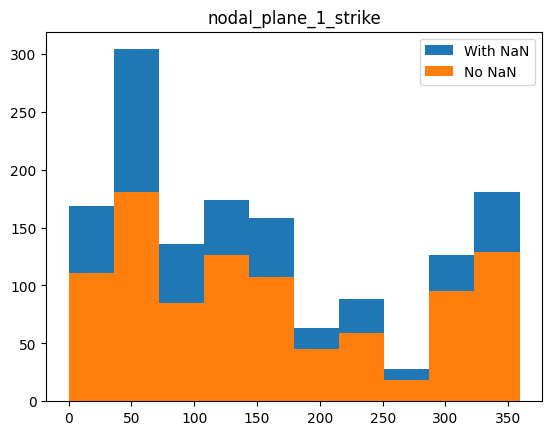

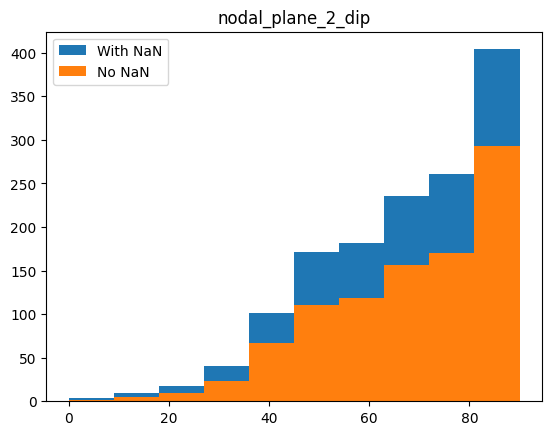

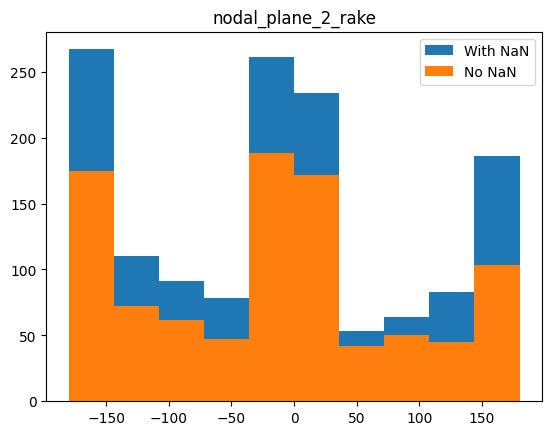

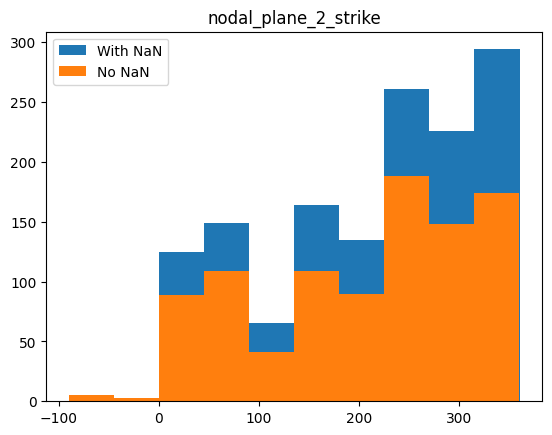

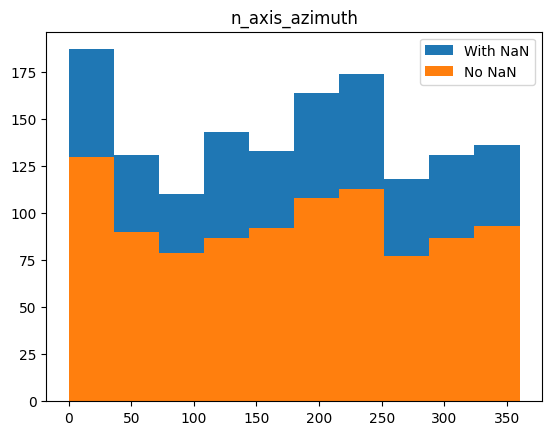

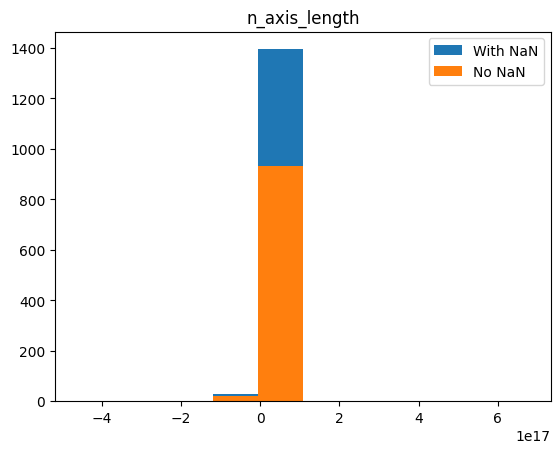

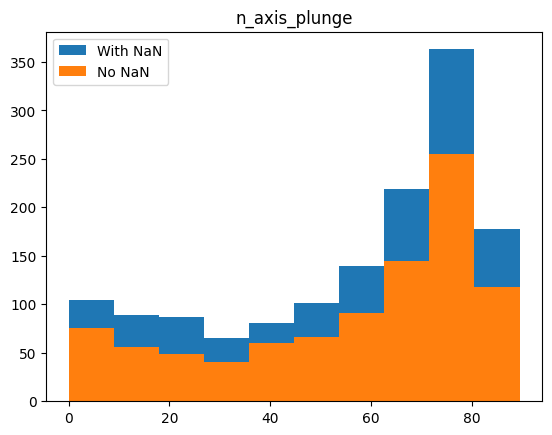

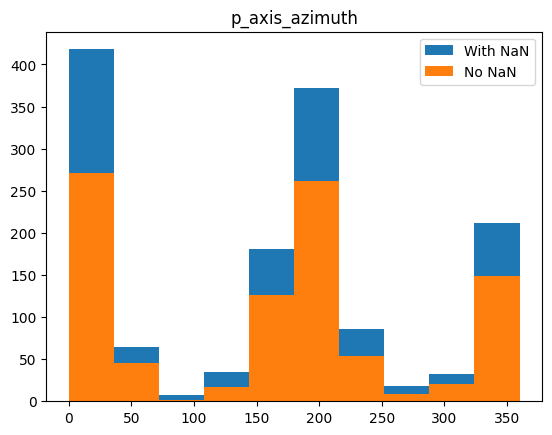

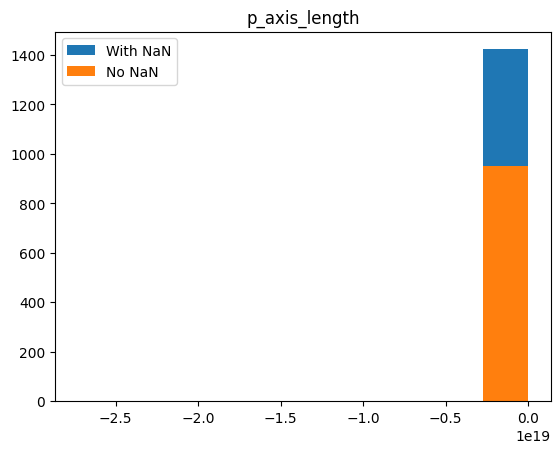

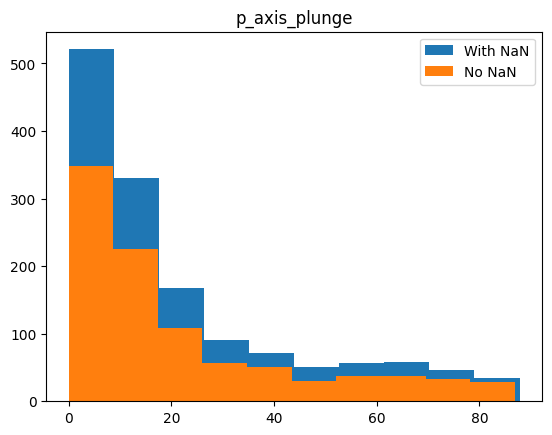

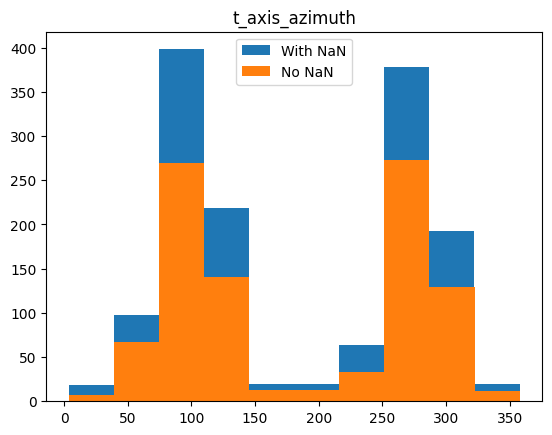

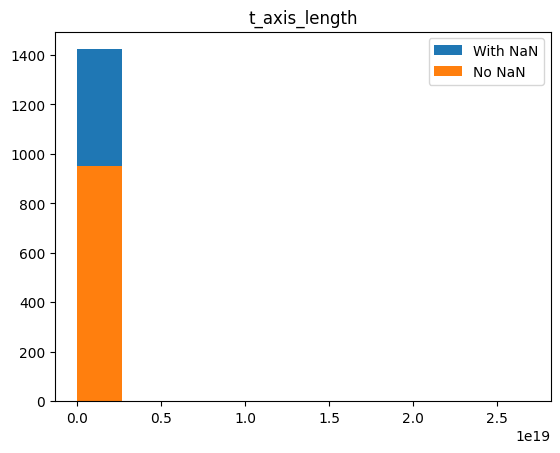

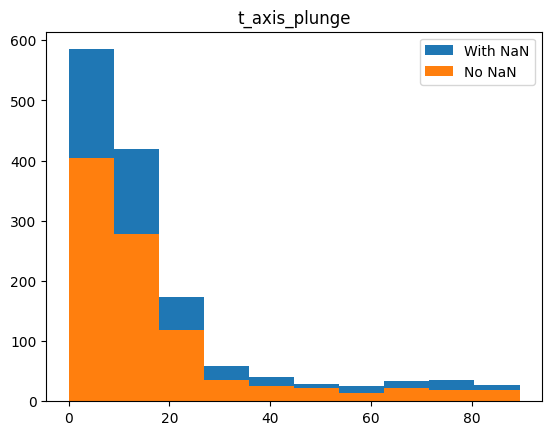

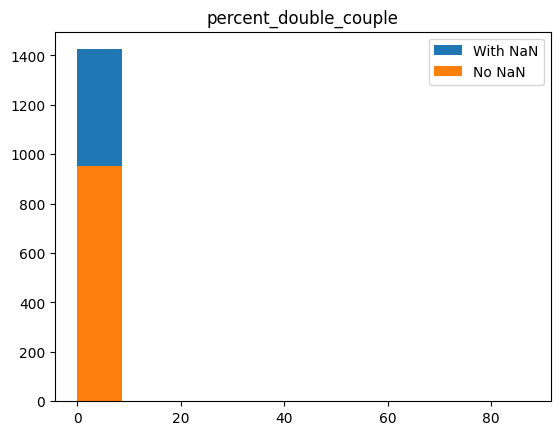

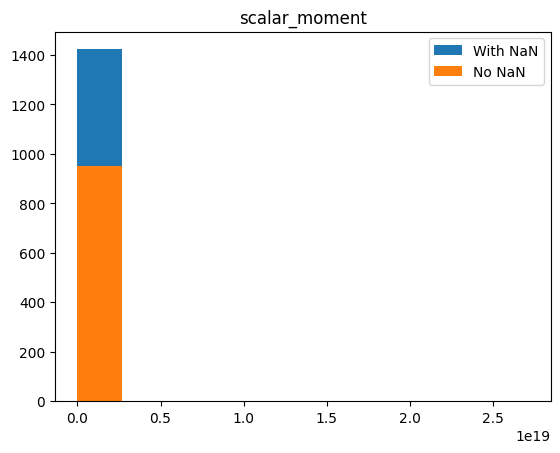

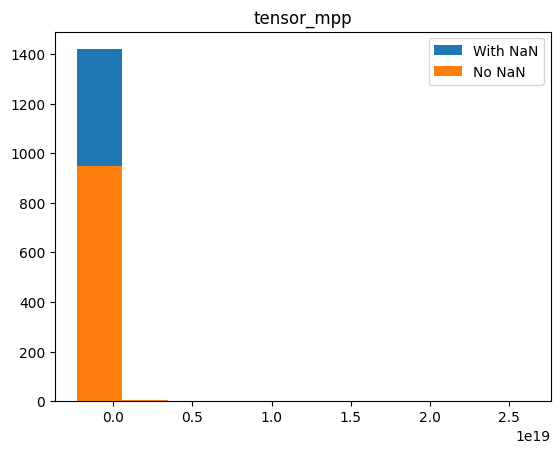

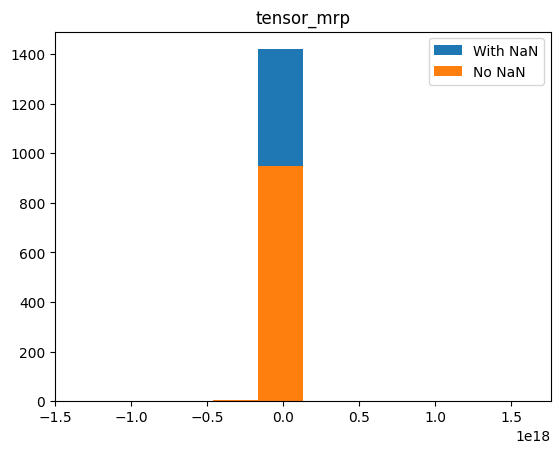

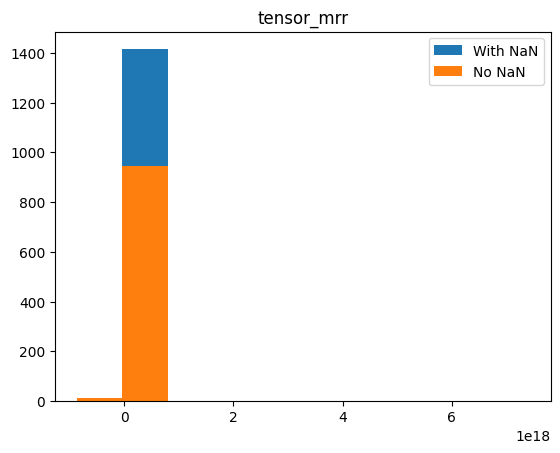

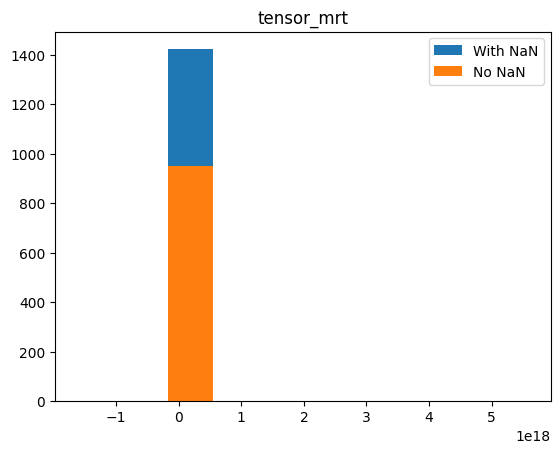

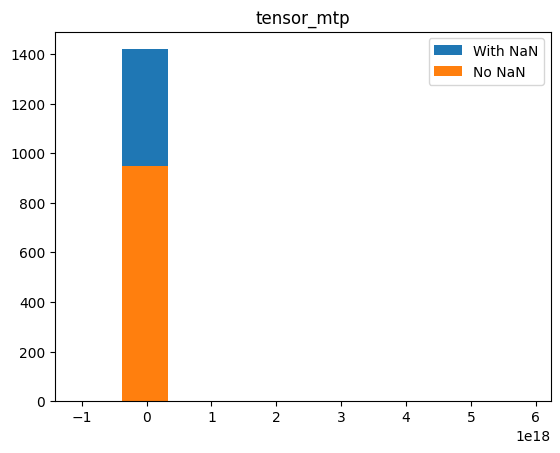

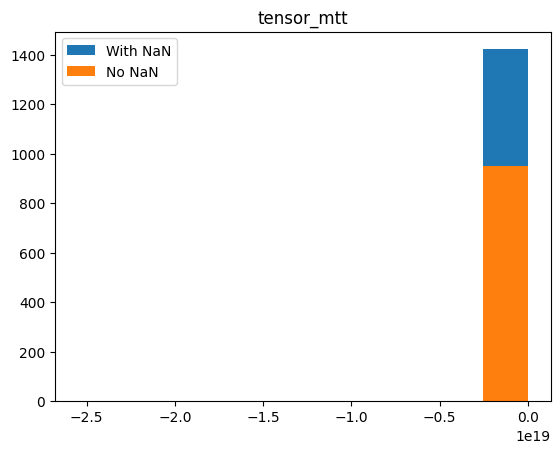

In [57]:
# Compare data distribution before and after removal of rows with NaN
for col in df.describe().columns:
    plt.title(col)
    plt.hist(df[col], label='With NaN')
    plt.hist(df_cleaned[col], label='No NaN')
    plt.legend()

    plt.show()

**Conclusion:** It seems safe to remove rows with `NaN` values since the distribution of data does not change.

## Exploratory Data Analysis

We are interested in predicting the intensity of an earthquake depending on its physical characteristics, such as depth, magnitude, forces in various directions, etc.

One measure for the intensity of an earthquake is the Modified Mercalli Intensity (MMI) Scale (https://www.usgs.gov/programs/earthquake-hazards/modified-mercalli-intensity-scale). Therefore, the `mmi` column is a good target.

Let's explore the correlations between `mmi` and the other data.

In [74]:
# Calculate correlations
df_cleaned.select_dtypes(include=['float64', 'int64']).corr()['mmi']

longitude                0.378058
latitude                -0.369508
depth                   -0.284552
magnitude                0.591886
felt                     0.334014
cdi                      0.513751
mmi                      1.000000
significance             0.523127
number_stations          0.112962
min_station_distance    -0.103455
nodal_plane_1_dip        0.082083
nodal_plane_1_rake      -0.018706
nodal_plane_1_strike     0.155257
nodal_plane_2_dip        0.168095
nodal_plane_2_rake       0.017139
nodal_plane_2_strike    -0.122790
n_axis_azimuth          -0.078610
n_axis_length            0.027746
n_axis_plunge            0.086094
p_axis_azimuth          -0.006829
p_axis_length           -0.214956
p_axis_plunge           -0.040314
t_axis_azimuth           0.013931
t_axis_length            0.217133
t_axis_plunge           -0.084266
percent_double_couple    0.016182
scalar_moment            0.216094
tensor_mpp               0.169567
tensor_mrp              -0.030560
tensor_mrr    

To not introduce data leakage, we will drop the columns `felt`, `cdi`, and `significance` since they contain different measures of an earthquakes intensity. In particular,
* `felt` contains the number of "Felt" reports submitted to the "Did You Feel It" system,
* `cdi` contains another measure for the intensity, and
* `significance` contains the significance of an earthquake which is determined by factors such as magnitude, maximum MMI, felt reports, and estimated impact.
Source: Various links on https://earthquake.usgs.gov/data/comcat/.


In [79]:
# Drop columns 'felt', 'cdi', and 'sig'
df_cleaned.drop(columns=['felt', 'cdi', 'significance'], inplace=True)
df_cleaned.head()

,id,time,place,longitude,latitude,depth,magnitude,mmi,number_stations,min_station_distance,...,t_axis_length,t_axis_plunge,percent_double_couple,scalar_moment,tensor_mpp,tensor_mrp,tensor_mrr,tensor_mrt,tensor_mtp,tensor_mtt
0,nc21044694,1999-08-18 01:06:18.940000+00:00,"0 km S of Bolinas, California",-122.686500,37.907333,7.659,4.60,5.38,71.0,0.02883,...,8.312000e+15,80.769,0.48,9.756000e+15,-2.216000e+15,-1.915000e+15,7.806000e+15,2.421000e+15,6.588000e+15,-5.590000e+15
1,nc21140955,2000-12-27 13:15:11.220000+00:00,"20 km SW of Ferndale, California",-124.460167,40.466000,28.026,4.10,2.86,37.0,0.09459,...,1.490000e+15,32.902,0.96,1.474000e+15,9.714000e+14,-7.529000e+14,1.047000e+14,-7.374000e+14,8.916000e+13,-1.076000e+15
2,nc21139833,2000-12-20 23:39:14.800000+00:00,"12 km NNW of Burney, California",-121.693500,40.988500,17.109,4.40,3.53,60.0,0.24320,...,5.141000e+15,6.658,0.84,4.943000e+15,3.524000e+15,1.649000e+15,-4.008000e+15,8.137000e+14,-2.609000e+15,4.844000e+14
3,nc21137862,2000-12-08 07:41:11.460000+00:00,"5 km SW of Cobb, California",-122.766833,38.782333,3.461,4.37,3.58,58.0,0.03333,...,5.195000e+15,11.860,0.45,4.482000e+15,4.383000e+15,-1.630000e+15,-1.694000e+15,6.186000e+14,1.983000e+15,-2.690000e+15
4,nc21136858,2000-12-02 15:34:16.320000+00:00,"5 km NW of Kingvale, California",-120.473500,39.357833,4.839,4.40,4.82,182.0,0.20540,...,5.552000e+15,14.670,0.99,5.534000e+15,3.222000e+15,3.054000e+14,-9.109000e+14,2.807000e+15,3.791000e+15,-2.311000e+15


Since we are looking to build a classification model, we have to divide the earthquake records into different classes depending on the MMI value (since it is our target).

Any MMI value larger than than 4 is felt by many people. An MMI value larger than 5 is felt by almost anyone with property damage starting to occur. Therefore, it seems reasonable to use `mmi=4` and `mmi=5` as values to distinguish three classes of earthquakes, one with `mmi<4`, one with `4<=mmi<5`, and another with `mmi>=5`.

In [83]:
# Add a column for the 'mmi' class
df_cleaned['mmi_class'] = [0 if mmi<4 else 1 if mmi>=4 and mmi<5 else 2 for mmi in df_cleaned['mmi']]

In [84]:
# Check how many records are in each class
display(df_cleaned['mmi_class'].value_counts())

mmi_class
0    352
1    352
2    252
Name: count, dtype: int64

Ecah class contains a similar number of records. Hence, we do not have to worry about imbalanced classes.

In [85]:
# Drop the 'mmi' column so there is no data leakage
df_final = df_cleaned.drop(columns='mmi')

df_final.head()

,id,time,place,longitude,latitude,depth,magnitude,number_stations,min_station_distance,nodal_plane_1_dip,...,t_axis_plunge,percent_double_couple,scalar_moment,tensor_mpp,tensor_mrp,tensor_mrr,tensor_mrt,tensor_mtp,tensor_mtt,mmi_class
0,nc21044694,1999-08-18 01:06:18.940000+00:00,"0 km S of Bolinas, California",-122.686500,37.907333,7.659,4.60,71.0,0.02883,80.0,...,80.769,0.48,9.756000e+15,-2.216000e+15,-1.915000e+15,7.806000e+15,2.421000e+15,6.588000e+15,-5.590000e+15,2
1,nc21140955,2000-12-27 13:15:11.220000+00:00,"20 km SW of Ferndale, California",-124.460167,40.466000,28.026,4.10,37.0,0.09459,60.0,...,32.902,0.96,1.474000e+15,9.714000e+14,-7.529000e+14,1.047000e+14,-7.374000e+14,8.916000e+13,-1.076000e+15,0
2,nc21139833,2000-12-20 23:39:14.800000+00:00,"12 km NNW of Burney, California",-121.693500,40.988500,17.109,4.40,60.0,0.24320,50.0,...,6.658,0.84,4.943000e+15,3.524000e+15,1.649000e+15,-4.008000e+15,8.137000e+14,-2.609000e+15,4.844000e+14,0
3,nc21137862,2000-12-08 07:41:11.460000+00:00,"5 km SW of Cobb, California",-122.766833,38.782333,3.461,4.37,58.0,0.03333,55.0,...,11.860,0.45,4.482000e+15,4.383000e+15,-1.630000e+15,-1.694000e+15,6.186000e+14,1.983000e+15,-2.690000e+15,0
4,nc21136858,2000-12-02 15:34:16.320000+00:00,"5 km NW of Kingvale, California",-120.473500,39.357833,4.839,4.40,182.0,0.20540,55.0,...,14.670,0.99,5.534000e+15,3.222000e+15,3.054000e+14,-9.109000e+14,2.807000e+15,3.791000e+15,-2.311000e+15,1
